In [1]:
import random
import math
import matplotlib.pyplot as plt
import time
from tabulate import tabulate 
from itertools import product,islice
from concurrent.futures import ThreadPoolExecutor

# Define functions f(n) from a list of choices
f_choices = {
    "n": lambda n: n,
    "n log(n)": lambda n: n * math.log(n),
    "n^2": lambda n: n ** 2,
    "n^2.5": lambda n: n ** 2.5,
    "n^3": lambda n: n ** 3,
    "n^4": lambda n: n ** 4
}

possible_a = range(2, 3)  # a can be 1 to 5
possible_b = [1 + i / 5 for i in range(1, 5)]  # b can be 1.2, 1.4, 1.6, 1.8, 2.0
f_choice_items = list(f_choices.items())  # List of (f_choice_name, f_choice_func)

all_params = list(product(possible_a, possible_b, f_choice_items))
random.shuffle(all_params)

selected_params = list(islice(all_params, 8))
n_values = [ 2**i for i in range(5, 16)]

def memoized_T(a, b, f, n):
    memo = {}

    def T(n):
        if n in memo:
            return memo[n]
        if n < 10:  # Assuming base case for n < 1
            result = n
        else:
            result = T(n // b) + T(n // b) + f(n)
        memo[n] = result
        return result

    T(n)
    return memo

def not_memoized_T2(a, b, f, n):
    memo = {}
    # here a is always 2, since we use T2() + T2()

    def T2(n):
        # if n in memo: return memo[n]           # Let's not use memoization if commented out
        if n < 10:  # Base case for n < 10
            result = n
        else:
            result = T2(n // b) + T2(n // b) + f(n)

        memo[n] = result
        return result

    T2(n)  # Run T2(n) for the input n
    return memo


# Measure time and collect results for both memoized_T and memoized_T2
def measure_time_and_collect_results(func, a, b, f, n_values):
    combined_memo = {}
    start_time = time.time()
    for n in n_values:
        result = func(a, b, f, n)
        combined_memo.update(result)  # Merge new results into the combined memo
    elapsed_time = time.time() - start_time
    return combined_memo, elapsed_time

# Generate a list of random n values between 5000 and 10,000
random_n_values = [random.randint(100, 601) for _ in range(10)] # generate a list of 10 random ints
random_n2_values = [random.randint(100, 601) for _ in range(10)] # generate a list of 10 random ints

Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 0.000000 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 0.000000 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 0.000504 seconds
Time taken for memoized_T: 0.000255 seconds
Time taken for memoized_T2: 0.000301 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 0.003873 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 6.616879 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 7.366117 seconds
Time taken for memoized_T: 0.000000 seconds
Time taken for memoized_T2: 7.791023 seconds


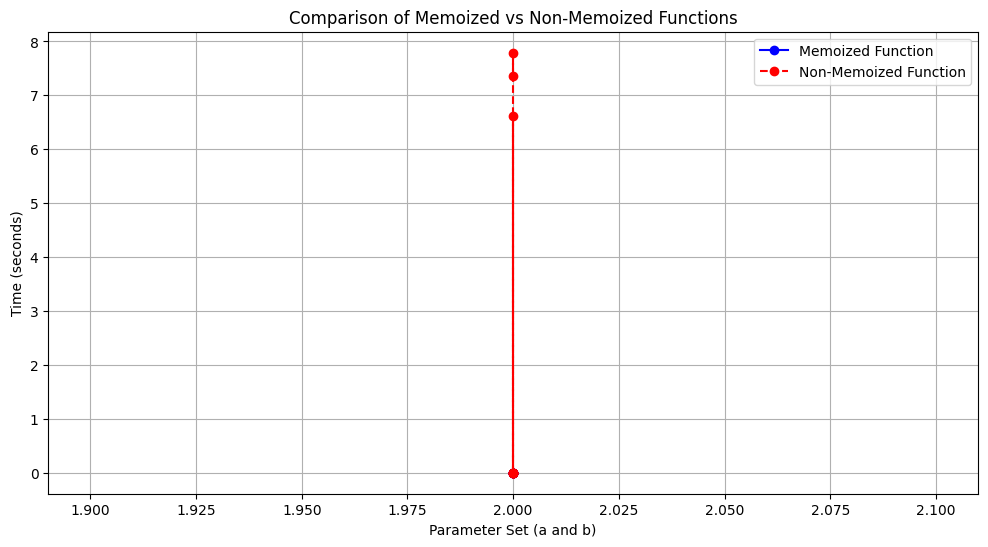

In [4]:

memoized_runs = []
non_memoized_runs = []

def process_run(params):
    a, b, (f_choice_name, f_choice_func) = params

    # Measure for memoized function
    memo_T, time_T = measure_time_and_collect_results(memoized_T, a, b, f_choice_func, random_n_values)
    
    # Store memoized results
    memoized_run_results = {
        "a": a,
        "b": b,
        "f_choice": f_choice_name,
        "T_values": list(memo_T.values()),  # Converting to list once
        "time": time_T
    }

    # Measure for non-memoized function
    memo_T2, time_T2 = measure_time_and_collect_results(not_memoized_T2, a, b, f_choice_func, random_n2_values)
    # Report the measured times
    print(f"Time taken for memoized_T: {time_T:.6f} seconds")
    print(f"Time taken for memoized_T2: {time_T2:.6f} seconds")
    # Store non-memoized results
    non_memoized_run_results = {
        "a": a,
        "b": b,
        "f_choice": f_choice_name,
        "T_values": list(memo_T2.values()),  # Converting to list once
        "time": time_T2
    }

    return memoized_run_results, non_memoized_run_results

# Optional: Use parallel processing to speed up
with ThreadPoolExecutor(max_workers=8) as executor:
    results = executor.map(process_run, selected_params)

# Collect the results from parallel processing
for memoized_run, non_memoized_run in results:
    memoized_runs.append(memoized_run)
    non_memoized_runs.append(non_memoized_run)

# Sorting based on the final T(n) values
memoized_runs.sort(key=lambda run: run["T_values"][-1], reverse=True)
non_memoized_runs.sort(key=lambda run: run["T_values"][-1], reverse=True)


a_values = [run["a"] for run in memoized_runs]
b_values = [run["b"] for run in memoized_runs]
memoized_times = [run["time"] for run in memoized_runs]
non_memoized_times = [run["time"] for run in non_memoized_runs]

# Prepare the plot
plt.figure(figsize=(12, 6))

# Plot memoized times
plt.plot(a_values, memoized_times, marker='o', linestyle='-', color='b', label='Memoized Function')
plt.plot(a_values, non_memoized_times, marker='o', linestyle='--', color='r', label='Non-Memoized Function')

# Add labels and title
plt.xlabel('Parameter Set (a and b)')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Memoized vs Non-Memoized Functions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


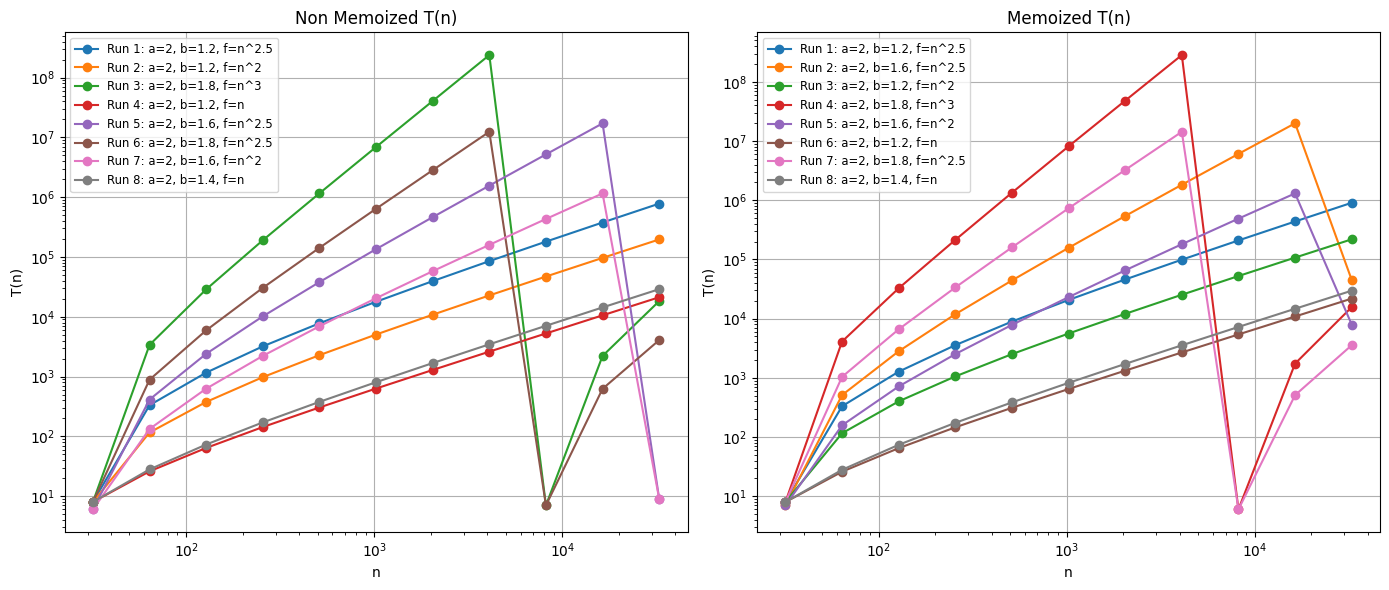


Non Memoized Runs Table:

+-------+-----+-----+------------+-------+------------------+
| Run   |   a |   b | f_choice   |     n |             T(n) |
+=======+=====+=====+============+=======+==================+
| Run 1 |   2 | 1.2 | n^2.5      |    32 |      8           |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |    64 |    332.228       |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |   128 |   1163.29        |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |   256 |   3197.99        |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |   512 |   7770.6         |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |  1024 |  17811.4         |
+-------+-----+-----+------------+-------+------------------+
| Run 1 |   2 | 1.2 | n^2.5      |  2048 | 

In [3]:
# Create two subplots for side-by-side graph display
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for non-memoized runs on the left
for idx, run in enumerate(non_memoized_runs):
    positive_T_values = [int(T_val) for T_val in run["T_values"] if int(T_val) > 0]
    min_length = min(len(n_values), len(positive_T_values))
    corresponding_n_values = n_values[:min_length]
    truncated_T_values = positive_T_values[:min_length]
    
    if truncated_T_values and corresponding_n_values:
        axs[0].plot(corresponding_n_values, truncated_T_values,
                    label=f'Run {idx+1}: a={run["a"]}, b={run["b"]}, f={run["f_choice"]}', marker='o')

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel("n")
axs[0].set_ylabel("T(n)")
axs[0].set_title("Non Memoized T(n)")
axs[0].legend(loc="best", fontsize='small')
axs[0].grid(True)

# Plot for memoized runs on the right
for idx, run in enumerate(memoized_runs):
    positive_T_values = [int(T_val) for T_val in run["T_values"] if int(T_val) > 0]
    min_length = min(len(n_values), len(positive_T_values))
    corresponding_n_values = n_values[:min_length]
    truncated_T_values = positive_T_values[:min_length]
    
    if truncated_T_values and corresponding_n_values:
        axs[1].plot(corresponding_n_values, truncated_T_values,
                    label=f'Run {idx+1}: a={run["a"]}, b={run["b"]}, f={run["f_choice"]}', marker='o')

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel("n")
axs[1].set_ylabel("T(n)")
axs[1].set_title("Memoized T(n)")
axs[1].legend(loc="best", fontsize='small')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Prepare and print the non-memoized table
print("\nNon Memoized Runs Table:\n")
table_data_non_memoized = []
headers = ["Run", "a", "b", "f_choice", "n", "T(n)"]

for idx, run in enumerate(non_memoized_runs):
    for n, T_val in zip(n_values, run["T_values"]):
        table_data_non_memoized.append([f"Run {idx+1}", run['a'], run['b'], run['f_choice'], n, T_val])

print(tabulate(table_data_non_memoized, headers=headers, tablefmt="grid"))

# Prepare and print the memoized table
print("\nMemoized Runs Table:\n")
table_data_memoized = []

for idx, run in enumerate(memoized_runs):
    for n, T_val in zip(n_values, run["T_values"]):
        table_data_memoized.append([f"Run {idx+1}", run['a'], run['b'], run['f_choice'], n, T_val])

print(tabulate(table_data_memoized, headers=headers, tablefmt="grid"))
  